In [16]:
import pandas as pd 
import os

In [17]:
geoDF = pd.read_csv('./geodata.csv', index_col = 0)

In [18]:
geoDF.head()

,Site Name,Location,Coordinates,Landscape,Climate,Reference,Site PI,Data Available
Site ID,,,,,,,,
1,Bermuda Island,"Bermuda Island, England","32°15’N, 64°52’W",Coast,Dwa,Steen-Larsen et al. (2015),Hans Christian Steen-Larsen,In prep.
2,Beijing,"Beijing, China","40°0’N, 116°3’E",Urban,Dwa,Wen et al. (2010),Xuhui Lee and Xuefa Wen,Yes
3,Borden,"Borden, Canada","44°9′N, 79°6′W",forest,Dfb,Santos et al. (2012),Xuhui Lee,Yes
4,Camargue,"Vaccarès lagoon, France","43°35’N, 4°28’E",Wetland,Csb,Delattre et al. (2015),Christine Vallet-Coulomb,Yes
5,Dome C,"Concordia, South Pole","75°06′S, 123°23′E",Ice Sheet,-,Casado et al (2016),Mathieu Casado,Yes


In [24]:
isodfs = []
isopath = "./isotope-data/"
for filename in os.listdir(isopath):
    print(isopath + filename)
    df = pd.read_csv(isopath + filename)
    if 'Delta_18O' in df.columns and 'Delta_D' in df.columns:
        df = df[df['Delta_18O'] != -9999]
     
        df = df[df['Delta_D'] != -9999]

        
        if(len(df.index) > 0):
            print(filename + " has nontrivial data")
            isodfs.append(df)
    

./isotope-data/JP-Nagoya.csv
./isotope-data/Ship-RARAAVIS.csv
Ship-RARAAVIS.csv has nontrivial data
./isotope-data/SP-Teide.csv
SP-Teide.csv has nontrivial data
./isotope-data/Ship-PIRATAFR24.csv
Ship-PIRATAFR24.csv has nontrivial data
./isotope-data/US-NewHaven.csv
US-NewHaven.csv has nontrivial data
./isotope-data/CN-Gaoqiao.csv
CN-Gaoqiao.csv has nontrivial data
./isotope-data/AP-Kohnen.csv
AP-Kohnen.csv has nontrivial data
./isotope-data/CH-Rietholzbach.csv
CH-Rietholzbach.csv has nontrivial data
./isotope-data/AP-DomeC.csv
AP-DomeC.csv has nontrivial data
./isotope-data/Ship-JARE55.csv
Ship-JARE55.csv has nontrivial data
./isotope-data/US-Rosemount_G21.csv
./isotope-data/Ship-Bermuda.csv
Ship-Bermuda.csv has nontrivial data
./isotope-data/CN-Beijing.csv
CN-Beijing.csv has nontrivial data
./isotope-data/Ship-ACTIV.csv
Ship-ACTIV.csv has nontrivial data
./isotope-data/RU-Kourovka.csv
RU-Kourovka.csv has nontrivial data
./isotope-data/US-ManitouForest.csv
US-ManitouForest.csv has non

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [27]:
print(*isodfs, sep = ", ")

         TIMESTAMP  Latitude  lontitude      Q  Delta_18O  Delta_18O_std  \
0     201405011215     5.065     -4.000  18.03     -14.56          -9999   
1     201405011230     5.018     -3.999  18.23     -14.23          -9999   
2     201405011245     4.971     -3.997  18.51     -13.91          -9999   
3     201405011300     4.923     -3.993  18.73     -13.63          -9999   
4     201405011315     4.875     -3.990  18.72     -13.45          -9999   
...            ...       ...        ...    ...        ...            ...   
1808  201405200815     5.086     -3.998  16.92     -13.24          -9999   
1809  201405200830     5.103     -3.996  16.96     -13.19          -9999   
1810  201405200845     5.126     -3.992  16.95     -13.17          -9999   
1811  201405200900     5.164     -3.983  16.96     -13.19          -9999   
1812  201405200915     5.202     -3.975  16.93     -13.24          -9999   

      Delta_D  Delta_D_std      T     RH        P  Pricipitation    Rn    U  \
0     -1

In [26]:
megadf = pd.concat(isodfs).filter(['Delta_18O', 'Delta_D', 'Latitude', 'Longitude', 'TIMESTAMP', 'TIMESTAMP_START'])

<ipython-input-26-d583c737bb1a>:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  megadf = pd.concat(isodfs).filter(['Delta_18O', 'Delta_D', 'Latitude', 'Longitude', 'TIMESTAMP', 'TIMESTAMP_START'])


In [ ]:
megadf.columns

In [ ]:
megadf.head()

In [20]:
megadf.describe

<bound method NDFrame.describe of       Delta_18O  Delta_D  Latitude     TIMESTAMP  TIMESTAMP_START
0        -14.56  -104.74     5.065  2.014050e+11              NaN
1        -14.23  -102.42     5.018  2.014050e+11              NaN
2        -13.91   -99.90     4.971  2.014050e+11              NaN
3        -13.63   -97.58     4.923  2.014050e+11              NaN
4        -13.45   -96.17     4.875  2.014050e+11              NaN
...         ...      ...       ...           ...              ...
2657     -12.82   -92.33    37.694  2.012091e+11              NaN
2658     -11.89   -85.69    37.710  2.012091e+11              NaN
2659     -10.64   -77.92 -9999.000  2.012091e+11              NaN
2660     -12.10   -86.74 -9999.000  2.012091e+11              NaN
2661     -10.83   -79.08 -9999.000  2.012091e+11              NaN

[145915 rows x 5 columns]>

In [21]:
megadf.info

<bound method DataFrame.info of       Delta_18O  Delta_D  Latitude     TIMESTAMP  TIMESTAMP_START
0        -14.56  -104.74     5.065  2.014050e+11              NaN
1        -14.23  -102.42     5.018  2.014050e+11              NaN
2        -13.91   -99.90     4.971  2.014050e+11              NaN
3        -13.63   -97.58     4.923  2.014050e+11              NaN
4        -13.45   -96.17     4.875  2.014050e+11              NaN
...         ...      ...       ...           ...              ...
2657     -12.82   -92.33    37.694  2.012091e+11              NaN
2658     -11.89   -85.69    37.710  2.012091e+11              NaN
2659     -10.64   -77.92 -9999.000  2.012091e+11              NaN
2660     -12.10   -86.74 -9999.000  2.012091e+11              NaN
2661     -10.83   -79.08 -9999.000  2.012091e+11              NaN

[145915 rows x 5 columns]>

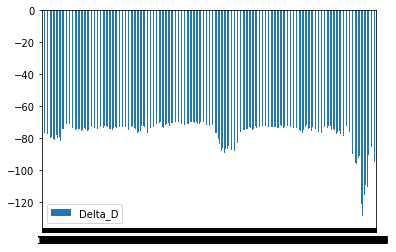

In [22]:
ax = df.plot.bar(y='Delta_D', rot=0)

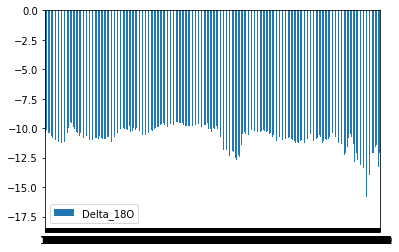

In [23]:
ax = df.plot.bar(y='Delta_18O', rot=0)